In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

In [4]:
directory = '/Users/maria/Documents/spiced/spiced_projects/spiced_repo/week8/data/'

In [5]:
df_monday = pd.read_csv(f'{directory}monday.csv',sep=';')

In [6]:
df_monday

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices
...,...,...,...
4879,2019-09-02 21:49:00,1442,checkout
4880,2019-09-02 21:49:00,1444,checkout
4881,2019-09-02 21:49:00,1445,dairy
4882,2019-09-02 21:50:00,1446,dairy


In [7]:
df_tuesday = pd.read_csv(f'{directory}tuesday.csv',sep=';')

In [8]:
df_tuesday

,timestamp,customer_no,location
0,2019-09-03 07:02:00,1,fruit
1,2019-09-03 07:02:00,2,drinks
2,2019-09-03 07:03:00,3,dairy
3,2019-09-03 07:05:00,1,drinks
4,2019-09-03 07:06:00,4,dairy
...,...,...,...
4709,2019-09-03 21:47:00,1421,drinks
4710,2019-09-03 21:47:00,1422,dairy
4711,2019-09-03 21:48:00,1421,checkout
4712,2019-09-03 21:49:00,1412,checkout


In [9]:
df_wednesday = pd.read_csv(f'{directory}wednesday.csv',sep=';')

In [10]:
df_wednesday

,timestamp,customer_no,location
0,2019-09-04 07:00:00,1,fruit
1,2019-09-04 07:00:00,2,dairy
2,2019-09-04 07:00:00,3,fruit
3,2019-09-04 07:00:00,4,fruit
4,2019-09-04 07:00:00,5,dairy
...,...,...,...
5045,2019-09-04 21:48:00,1528,spices
5046,2019-09-04 21:49:00,1520,dairy
5047,2019-09-04 21:49:00,1529,dairy
5048,2019-09-04 21:49:00,1530,fruit


In [11]:
df_thursday = pd.read_csv(f'{directory}thursday.csv',sep=';')

In [12]:
df_thursday

,timestamp,customer_no,location
0,2019-09-05 07:00:00,1,drinks
1,2019-09-05 07:01:00,2,fruit
2,2019-09-05 07:01:00,3,dairy
3,2019-09-05 07:01:00,4,dairy
4,2019-09-05 07:02:00,1,checkout
...,...,...,...
5099,2019-09-05 21:48:00,1533,dairy
5100,2019-09-05 21:48:00,1534,fruit
5101,2019-09-05 21:48:00,1535,spices
5102,2019-09-05 21:49:00,1534,checkout


In [13]:
df_friday = pd.read_csv(f'{directory}friday.csv',sep=';')

In [14]:
df_friday

,timestamp,customer_no,location
0,2019-09-06 07:00:00,1,dairy
1,2019-09-06 07:00:00,2,drinks
2,2019-09-06 07:00:00,3,fruit
3,2019-09-06 07:01:00,2,checkout
4,2019-09-06 07:01:00,4,drinks
...,...,...,...
5120,2019-09-06 21:50:00,1500,dairy
5121,2019-09-06 21:50:00,1507,checkout
5122,2019-09-06 21:50:00,1508,checkout
5123,2019-09-06 21:50:00,1509,drinks


In [15]:
dfs = [df_monday,df_tuesday,df_wednesday,df_thursday,df_friday]

0
          customer_no
location             
checkout         1437
dairy             720
drinks            661
fruit             827
spices            584


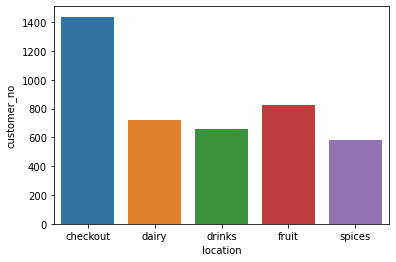

1
          customer_no
location             
checkout         1420
dairy             751
drinks            581
fruit             827
spices            543


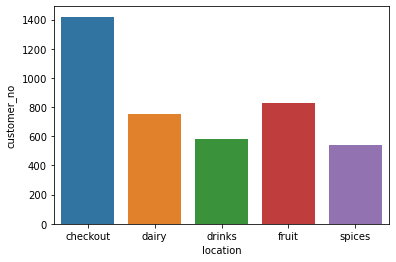

2
          customer_no
location             
checkout         1526
dairy             804
drinks            652
fruit             884
spices            565


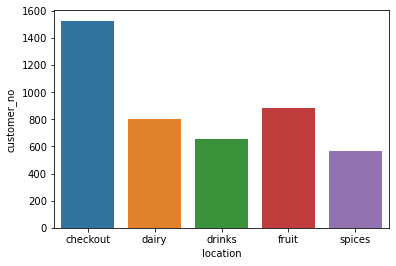

3
          customer_no
location             
checkout         1532
dairy             782
drinks            632
fruit             872
spices            613


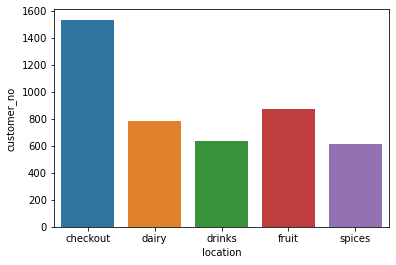

4
          customer_no
location             
checkout         1502
dairy             761
drinks            688
fruit             874
spices            633


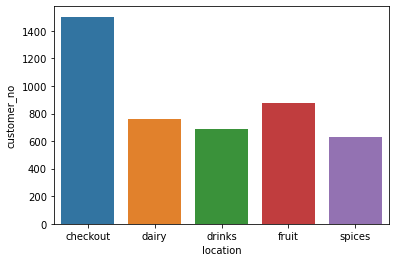

In [16]:
for i,df in enumerate(dfs):
    df['timestamp'] = df['timestamp'].astype(str)
    df.set_index(pd.to_datetime(df['timestamp']),inplace=True)
    df.drop(columns=['timestamp'], inplace=True)
    print(i)
    print(df.groupby(['location']).nunique())
    
    sns.barplot(data = df.groupby(['location']).nunique(),
                x=df.groupby(['location']).nunique().index,y='customer_no')
    plt.show()

In [17]:
df_week = pd.concat(dfs)
df_week['customer_ID'] = df_week.index.day*100000 
df_week['customer_ID'] = df_week['customer_ID'] + df_week['customer_no']
df_week.drop(columns=['customer_no'],inplace=True)


          customer_ID
location             
checkout         7417
dairy            3818
drinks           3214
fruit            4284
spices           2938


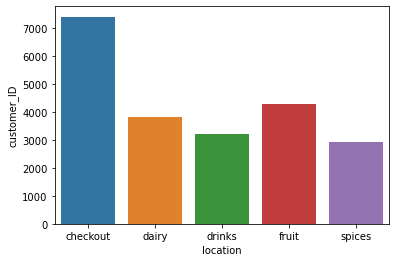

In [18]:
group = df_week.groupby(['location']).nunique()
print(group)
sns.barplot(data = group,
            x=group.index,y='customer_ID')
plt.show()

<AxesSubplot:xlabel='timestamp', ylabel='customer_ID'>

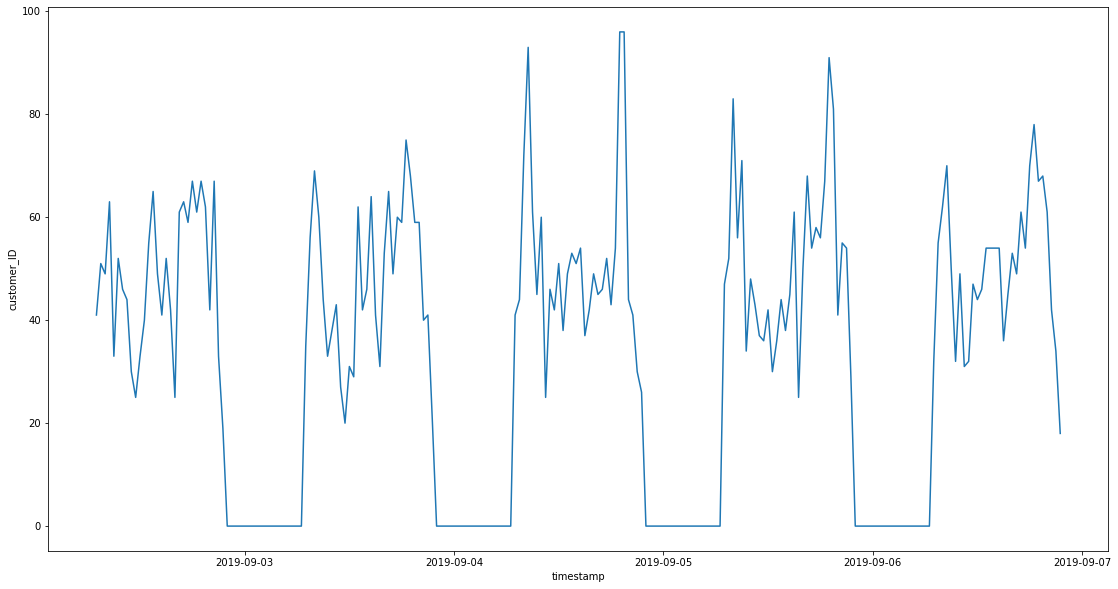

In [19]:
time_bin = '30min'
group = df_week[df_week['location']=='checkout']['customer_ID']
group = group.resample(time_bin).nunique()
plt.figure(figsize=(19,10))
sns.lineplot(data = group)

In [20]:
def time_diff(df):
    dt = df.index.max()-df.index.min()+datetime.timedelta(minutes = 1)
    return dt

In [21]:
time_spent = df_week.groupby('customer_ID').apply(time_diff)
time_spent.max()

Timedelta('0 days 00:53:00')

<AxesSubplot:xlabel='timestamp', ylabel='customer_ID'>

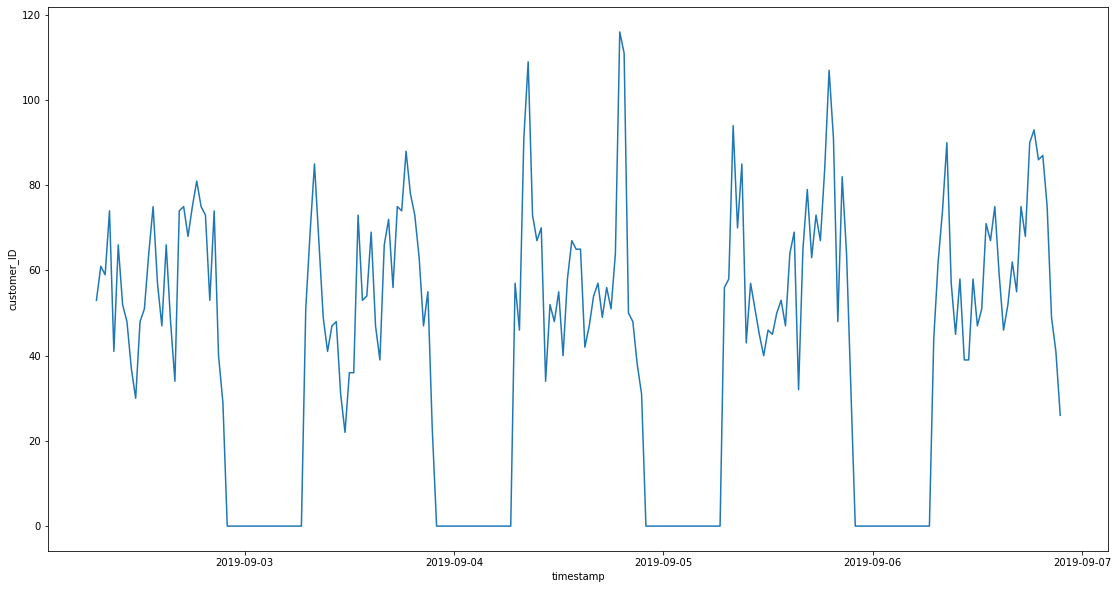

In [22]:
time_bin = '30min'
group = df_week['customer_ID'].resample(time_bin).nunique()
plt.figure(figsize=(19,10))
sns.lineplot(data = group)

In [23]:
# entry time
def entry_time(df):
    return df.index.min()
df_week.groupby('customer_ID').apply(entry_time)



customer_ID
200001   2019-09-02 07:03:00
200002   2019-09-02 07:03:00
200003   2019-09-02 07:04:00
200004   2019-09-02 07:04:00
200005   2019-09-02 07:04:00
                 ...        
601506   2019-09-06 21:48:00
601507   2019-09-06 21:48:00
601508   2019-09-06 21:48:00
601509   2019-09-06 21:50:00
601510   2019-09-06 21:50:00
Length: 7445, dtype: datetime64[ns]

In [24]:
# entry point
df_week[df_week.duplicated(subset=['customer_ID'], keep='last')]#['location']

,location,customer_ID
timestamp,,
2019-09-02 07:03:00,dairy,200001
2019-09-02 07:03:00,dairy,200002
2019-09-02 07:04:00,dairy,200003
2019-09-02 07:04:00,dairy,200004
2019-09-02 07:04:00,spices,200005
...,...,...
2019-09-06 21:48:00,fruit,601494
2019-09-06 21:48:00,fruit,601505
2019-09-06 21:48:00,dairy,601507


In [25]:
df_week[df_week['customer_ID']==200006]

,location,customer_ID
timestamp,,
2019-09-02 07:04:00,spices,200006
2019-09-02 07:05:00,dairy,200006
2019-09-02 07:17:00,spices,200006
2019-09-02 07:18:00,drinks,200006
2019-09-02 07:25:00,spices,200006
2019-09-02 07:26:00,dairy,200006
2019-09-02 07:27:00,spices,200006
2019-09-02 07:29:00,checkout,200006


In [26]:
df_week[df_week['customer_ID']==200007]

,location,customer_ID
timestamp,,
2019-09-02 07:04:00,spices,200007
2019-09-02 07:05:00,drinks,200007
2019-09-02 07:09:00,spices,200007
2019-09-02 07:11:00,fruit,200007
2019-09-02 07:13:00,checkout,200007


In [27]:
df_week.sort_values(by = ['customer_ID', 'timestamp'],inplace=True)

In [28]:
df_week

,location,customer_ID
timestamp,,
2019-09-02 07:03:00,dairy,200001
2019-09-02 07:05:00,checkout,200001
2019-09-02 07:03:00,dairy,200002
2019-09-02 07:06:00,checkout,200002
2019-09-02 07:04:00,dairy,200003
...,...,...
2019-09-06 21:50:00,checkout,601507
2019-09-06 21:48:00,dairy,601508
2019-09-06 21:50:00,checkout,601508


In [29]:
df_week['Time'] = df_week.index
df_week.head(20)

,location,customer_ID,Time
timestamp,,,
2019-09-02 07:03:00,dairy,200001,2019-09-02 07:03:00
2019-09-02 07:05:00,checkout,200001,2019-09-02 07:05:00
2019-09-02 07:03:00,dairy,200002,2019-09-02 07:03:00
2019-09-02 07:06:00,checkout,200002,2019-09-02 07:06:00
2019-09-02 07:04:00,dairy,200003,2019-09-02 07:04:00
2019-09-02 07:06:00,checkout,200003,2019-09-02 07:06:00
2019-09-02 07:04:00,dairy,200004,2019-09-02 07:04:00
2019-09-02 07:08:00,checkout,200004,2019-09-02 07:08:00
2019-09-02 07:04:00,spices,200005,2019-09-02 07:04:00


In [30]:
df_week['Delta_t'] = (df_week['Time'].shift(-1)-df_week.index).astype('timedelta64[m]')


In [31]:
df_week['location_after'] = np.where(df_week['customer_ID'].shift(-1)==df_week['customer_ID'],df_week['location'].shift(-1),'exit')
df_week.head(25)

,location,customer_ID,Time,Delta_t,location_after
timestamp,,,,,
2019-09-02 07:03:00,dairy,200001,2019-09-02 07:03:00,2.0,checkout
2019-09-02 07:05:00,checkout,200001,2019-09-02 07:05:00,-2.0,exit
2019-09-02 07:03:00,dairy,200002,2019-09-02 07:03:00,3.0,checkout
2019-09-02 07:06:00,checkout,200002,2019-09-02 07:06:00,-2.0,exit
2019-09-02 07:04:00,dairy,200003,2019-09-02 07:04:00,2.0,checkout
2019-09-02 07:06:00,checkout,200003,2019-09-02 07:06:00,-2.0,exit
2019-09-02 07:04:00,dairy,200004,2019-09-02 07:04:00,4.0,checkout
2019-09-02 07:08:00,checkout,200004,2019-09-02 07:08:00,-4.0,exit
2019-09-02 07:04:00,spices,200005,2019-09-02 07:04:00,1.0,checkout


In [32]:
df_week['Delta_t'][df_week['customer_ID'].shift(-1)!=df_week['customer_ID']]= 'exit'
df_week


/var/folders/c4/jkw5wy1d7lndc6p4y832vmrc0000gn/T/ipykernel_6454/3046876169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_week['Delta_t'][df_week['customer_ID'].shift(-1)!=df_week['customer_ID']]= 'exit'


,location,customer_ID,Time,Delta_t,location_after
timestamp,,,,,
2019-09-02 07:03:00,dairy,200001,2019-09-02 07:03:00,2.0,checkout
2019-09-02 07:05:00,checkout,200001,2019-09-02 07:05:00,exit,exit
2019-09-02 07:03:00,dairy,200002,2019-09-02 07:03:00,3.0,checkout
2019-09-02 07:06:00,checkout,200002,2019-09-02 07:06:00,exit,exit
2019-09-02 07:04:00,dairy,200003,2019-09-02 07:04:00,2.0,checkout
...,...,...,...,...,...
2019-09-06 21:50:00,checkout,601507,2019-09-06 21:50:00,exit,exit
2019-09-06 21:48:00,dairy,601508,2019-09-06 21:48:00,2.0,checkout
2019-09-06 21:50:00,checkout,601508,2019-09-06 21:50:00,exit,exit


In [33]:
df_week.drop(columns=['Time'],inplace=True)


In [34]:
df_week.head(30)

,location,customer_ID,Delta_t,location_after
timestamp,,,,
2019-09-02 07:03:00,dairy,200001,2.0,checkout
2019-09-02 07:05:00,checkout,200001,exit,exit
2019-09-02 07:03:00,dairy,200002,3.0,checkout
2019-09-02 07:06:00,checkout,200002,exit,exit
2019-09-02 07:04:00,dairy,200003,2.0,checkout
2019-09-02 07:06:00,checkout,200003,exit,exit
2019-09-02 07:04:00,dairy,200004,4.0,checkout
2019-09-02 07:08:00,checkout,200004,exit,exit
2019-09-02 07:04:00,spices,200005,1.0,checkout


In [35]:
transitions = df_week[df_week['location_after'] != 'exit']
transitions.head(30)

,location,customer_ID,Delta_t,location_after
timestamp,,,,
2019-09-02 07:03:00,dairy,200001,2.0,checkout
2019-09-02 07:03:00,dairy,200002,3.0,checkout
2019-09-02 07:04:00,dairy,200003,2.0,checkout
2019-09-02 07:04:00,dairy,200004,4.0,checkout
2019-09-02 07:04:00,spices,200005,1.0,checkout
2019-09-02 07:04:00,spices,200006,1.0,dairy
2019-09-02 07:05:00,dairy,200006,12.0,spices
2019-09-02 07:17:00,spices,200006,1.0,drinks
2019-09-02 07:18:00,drinks,200006,7.0,spices


In [36]:
for start_point in ['dairy','spices','drinks','fruit']:
    #for end_point in ['dairy','spices','drinks','fruit','checkout']:
        transitions[f'{start_point}-{start_point}'] = np.where(transitions['location']==start_point,(transitions['Delta_t']-1).astype(int),0)

/var/folders/c4/jkw5wy1d7lndc6p4y832vmrc0000gn/T/ipykernel_6454/3995689836.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transitions[f'{start_point}-{start_point}'] = np.where(transitions['location']==start_point,(transitions['Delta_t']-1).astype(int),0)


In [37]:
for start_point in ['dairy','spices','drinks','fruit']:
    for end_point in ['dairy','spices','drinks','fruit','checkout']:
        if start_point!=end_point:
            transitions[f'{start_point}-{end_point}'] = np.where((transitions['location']==start_point)&(transitions['location_after']==end_point),1,0)

/var/folders/c4/jkw5wy1d7lndc6p4y832vmrc0000gn/T/ipykernel_6454/3923703332.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transitions[f'{start_point}-{end_point}'] = np.where((transitions['location']==start_point)&(transitions['location_after']==end_point),1,0)


In [38]:
transitions.to_csv("transitions.csv")

In [ ]:
transition_matrix = transitions.drop(columns = ['location','customer_ID','location_after','Delta_t']).sum()
for i,item in enumerate(transition_matrix.index):
    print(i,item)

In [ ]:
transition_matrix = np.array([
    [transition_matrix[0],transition_matrix[4],transition_matrix[5],transition_matrix[6],transition_matrix[7]],
    [transition_matrix[8],transition_matrix[1],transition_matrix[9],transition_matrix[10],transition_matrix[11]],
    [transition_matrix[12],transition_matrix[13],transition_matrix[2],transition_matrix[14],transition_matrix[15]],
    [transition_matrix[16],transition_matrix[17],transition_matrix[18],transition_matrix[3],transition_matrix[19]],
    [0,0,0,0,1],
])

In [ ]:
from sklearn.preprocessing import normalize
normed_matrix = normalize(transition_matrix, axis=1, norm='l1')

In [ ]:
normed_matrix